In [1]:
import pandas as pd # 데이터
import numpy as np # 기본적인 기능
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화
import matplotlib.font_manager as fm # 한글폰트 적용
import seaborn as sns # 시각화

font_path = 'NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path,size=18)

In [2]:
import warnings
warnings.filterwarnings('ignore')
#오류 뜨는거 보기싫어서 삭제

In [3]:
card_df = pd.read_csv('train.csv') # 데이터 저장
card_df.head(2) # 데이터 상단 2개보기

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [4]:
card_df.info() # 데이터 정보
# Nan 값이 있을 경우 오류가 발생할 수 있을거같아서 Nan값을 채워야함 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [5]:
card_df.shape # 행 열 갯수 파악

(26457, 20)

In [6]:
# fillna 함수로
cardfull_df = card_df.fillna(value='unemployed') # occyp_type의 Nan 값을  비고용자로 변경
cardfull_df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unemployed,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [7]:
cardfull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [8]:
cardfull_df.columns  # 칼럼

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [9]:
cardhangul = cardfull_df.rename(columns={'gender' : '성별',   # 이해하기 쉽게 칼럼을 한글로 변경
                      'car' : '차',
                      'reality' : '집',
                      'child_num' : '자녀 수',
                      'income_total' : '연간소득',
                      'income_type' : '소득분류',
                      'edu_type':'교육수준',
                      'family_type':'결혼여부',
                      'house_type':'생활방식',
                      'DAYS_BIRTH':'출생일',
                      'DAYS_EMPLOYED':'취직일',
                      'FLAG_MOBIL':'폰',
                      'work_phone':'업무용 폰',
                      'phone':'전화',
                      'email':'이메일',
                      'occyp_type' : '직업' ,
                      'family_size' : '가족규모',
                      'begin_month' : '카드발급일',
                      'credit':'신용등급'                        
                           })

In [10]:
cardhangul.head(2)

,index,성별,차,집,자녀 수,연간소득,소득분류,교육수준,결혼여부,생활방식,출생일,취직일,폰,업무용 폰,전화,이메일,직업,가족규모,카드발급일,신용등급
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,unemployed,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


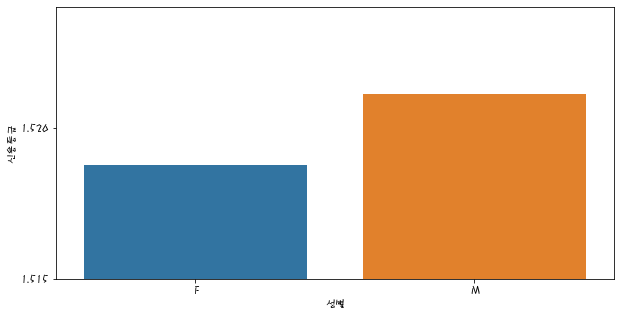

In [74]:
plt.rcParams['font.family']='HYsnrL'
gender_df = cardhangul.groupby('성별')['신용등급'].mean() # 성벌에 따른 신용등급 #sort_values 할 경우 값순서대로 출력가능 
gender_df = gender_df.reset_index() 
gender_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=gender_df,x='성별',y='신용등급') 
plt.ylim(1.515,1.524)
plt.yticks(np.arange(1.515 ,1.524,0.005))
plt.show()


In [12]:
fm.findSystemFonts()

['C:\\WINDOWS\\Fonts\\ENGDOSBI.TTF',
 'C:\\WINDOWS\\Fonts\\ENGARMBI.TTF',
 'C:\\WINDOWS\\Fonts\\HYSUPB.TTF',
 'C:\\Windows\\Fonts\\corbell.ttf',
 'C:\\WINDOWS\\Fonts\\wingding.ttf',
 'C:\\Windows\\Fonts\\mvboli.ttf',
 'C:\\WINDOWS\\Fonts\\SitkaB.ttc',
 'C:\\Windows\\Fonts\\ENORBITB.TTF',
 'C:\\Windows\\Fonts\\MT.TTF',
 'C:\\Windows\\Fonts\\MM.TTF',
 'C:\\WINDOWS\\Fonts\\ENORAT10.TTF',
 'C:\\Windows\\Fonts\\UNI_HSR.TTF',
 'C:\\Windows\\Fonts\\SitkaB.ttc',
 'C:\\WINDOWS\\Fonts\\HMKMA.TTF',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\YGBI08.TTF',
 'C:\\WINDOWS\\Fonts\\HANYheadL.ttf',
 'C:\\WINDOWS\\Fonts\\YNCH05.TTF',
 'C:\\Windows\\Fonts\\ENFUTUBK.TTF',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\WINDOWS\\Fonts\\Gabriola.ttf',
 'C:\\WINDOWS\\Fonts\\msyhl.ttc',
 'C:\\WINDOWS\\Fonts\\SitkaZ.ttc',
 'C:\\WINDOWS\\Fonts\\calibril.ttf',
 'C:\\WINDOWS\\Fonts\\HANSolB.ttf',
 'C:\\WINDOWS\\Fonts\\pala.ttf',
 'C:\\Windows\\Fonts\\palabi.ttf',
 'C:

In [13]:
mpl.font_manager._rebuild()

In [14]:
[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name][:20]

[('NanumGothic',
  'C:\\Users\\Changwan\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf')]

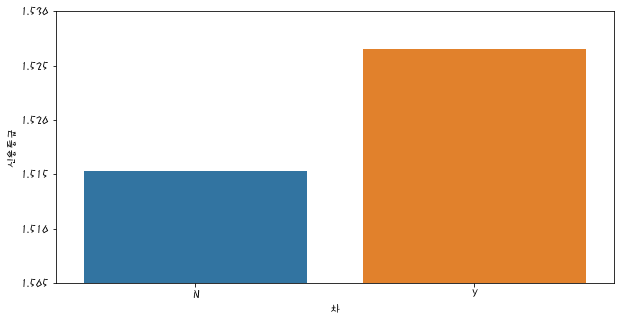

In [77]:
car_df = cardhangul.groupby('차')['신용등급'].mean()  # 차 유무에 따른 신용등급
car_df = car_df.reset_index()
car_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=car_df,x='차',y='신용등급') 
plt.ylim(1.515,1.524)
plt.yticks(np.arange(1.505 ,1.530,0.005))
plt.show()

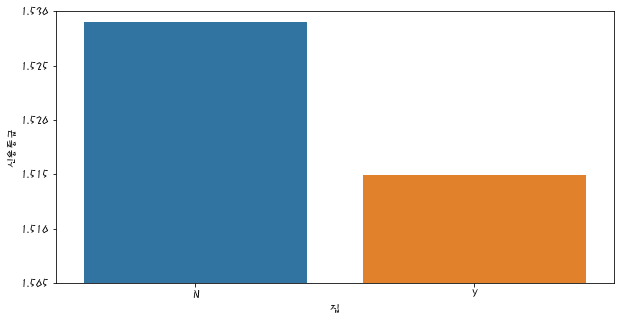

In [79]:
house_df = cardhangul.groupby('집')['신용등급'].mean() # 집소유에 따른 신용등급
house_df = house_df.reset_index()
house_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=house_df,x='집',y='신용등급') 
plt.ylim(1.515,1.524)
plt.yticks(np.arange(1.505 ,1.530,0.005))
plt.show()

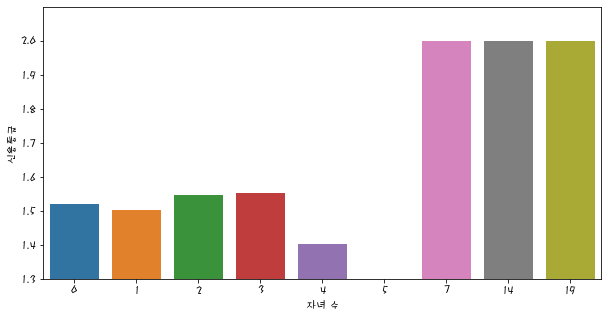

In [83]:
child_df = cardhangul.groupby('자녀 수')['신용등급'].mean() #자녀수에 따른 신용등급
child_df = child_df.reset_index()
child_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=child_df,x='자녀 수',y='신용등급') 
plt.ylim(1.3,2.1)
plt.yticks(np.arange(1.3 ,2.1,0.1))
plt.show()

In [18]:
cardhangul.groupby('연간소득')['신용등급'].mean() #연소득은 
# if함수 써야될듯

연간소득
27000.0      1.500000
29250.0      0.800000
30150.0      2.000000
31500.0      0.846154
31531.5      2.000000
               ...   
945000.0     1.500000
990000.0     1.666667
1125000.0    1.500000
1350000.0    2.000000
1575000.0    2.000000
Name: 신용등급, Length: 249, dtype: float64

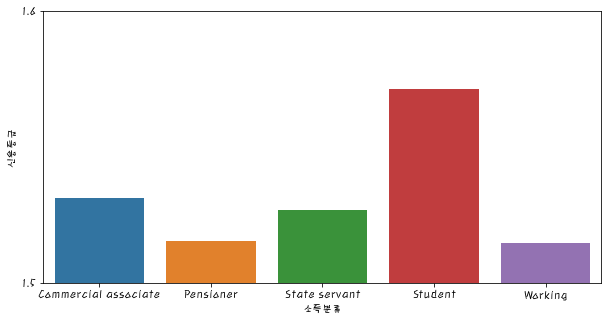

In [85]:
sodic_df =cardhangul.groupby('소득분류')['신용등급'].mean() #소득 분류
sodic_df = sodic_df.reset_index()
sodic_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=sodic_df,x='소득분류',y='신용등급') 
plt.ylim(1.5,1.6)
plt.yticks(np.arange(1.5,1.6,0.1))
plt.show()
# Commercial associate : 회사원
# Pensioner : 퇴직후 연금수령자
# State servant : 공무원
# Student : 학생
# Working : 그외 직업


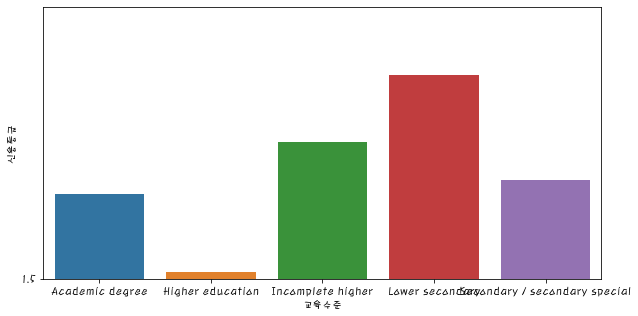

In [86]:
edu_df =cardhangul.groupby('교육수준')['신용등급'].mean() # 교육수준에 따른 신용등급
edu_df = edu_df.reset_index()
edu_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=edu_df,x='교육수준',y='신용등급') 
plt.ylim(1.5,1.57)
plt.yticks(np.arange(1.5,1.57,0.1))
plt.show()

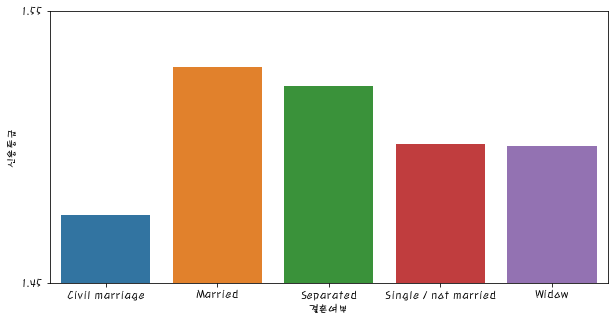

In [87]:
marry_df = cardhangul.groupby('결혼여부')['신용등급'].mean() # 결혼여부에 따른 신용등급
marry_df = marry_df.reset_index()
marry_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=marry_df,x='결혼여부',y='신용등급') 
plt.ylim(1.45,1.55)
plt.yticks(np.arange(1.45,1.55,0.1))
plt.show()

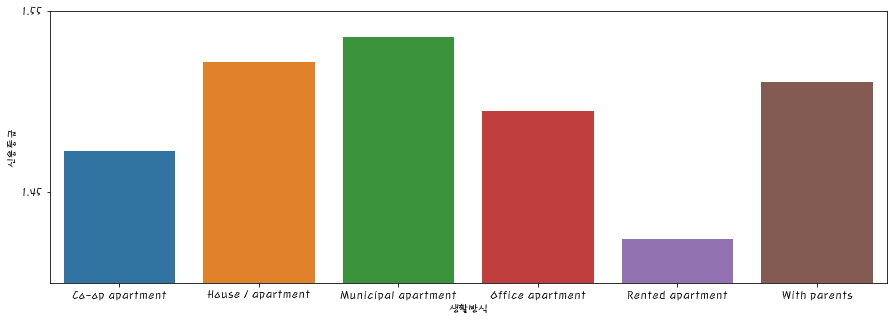

In [90]:
type_df = cardhangul.groupby('생활방식')['신용등급'].mean() # 생활방식에 따른 신용등급
type_df = type_df.reset_index()
type_df
plt.figure(figsize=(15,5)) 
sns.barplot(data=type_df,x='생활방식',y='신용등급') 
plt.ylim(1.40,1.55)
plt.yticks(np.arange(1.45,1.55,0.1))
plt.show()

In [23]:
cardhangul.groupby('출생일')['신용등급'].mean() #출생일 
# 이것도 if 함수 써야함

출생일
-25152    2.000000
-25140    0.000000
-25099    2.000000
-25088    0.000000
-24970    1.000000
            ...   
-8041     2.000000
-7959     2.000000
-7757     0.666667
-7723     1.000000
-7705     2.000000
Name: 신용등급, Length: 6621, dtype: float64

In [24]:
cardhangul.groupby('취직일')['신용등급'].mean() # 취직연차?
#if 함수사용

취직일
-15713     2.000000
-15661     2.000000
-15072     1.333333
-15038     1.071429
-14887     0.600000
             ...   
-70        2.000000
-65        2.000000
-43        1.000000
-17        2.000000
 365243    1.514196
Name: 신용등급, Length: 3470, dtype: float64

In [25]:
cardhangul.groupby('폰')['신용등급'].mean() # 폰여부
# 핸드폰없는사람이 없음

폰
1    1.51956
Name: 신용등급, dtype: float64

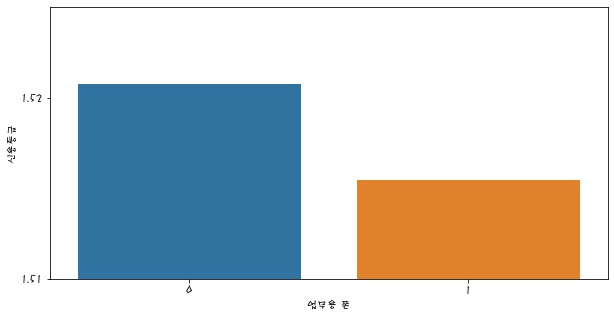

In [93]:
workphone_df=cardhangul.groupby('업무용 폰')['신용등급'].mean() # 업무용 폰 여부
workphone_df = workphone_df.reset_index()
workphone_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=workphone_df,x='업무용 폰',y='신용등급') 
plt.ylim(1.51,1.525)
plt.yticks(np.arange(1.51,1.525,0.01))
plt.show()

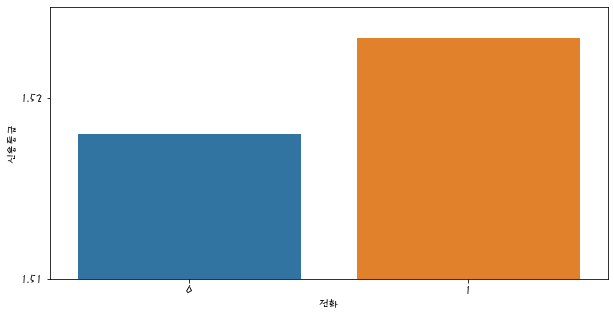

In [95]:
tel_df=cardhangul.groupby('전화')['신용등급'].mean() # 전화 여부
tel_df = tel_df.reset_index()
tel_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=tel_df,x='전화',y='신용등급') 
plt.ylim(1.51,1.525)
plt.yticks(np.arange(1.51,1.525,0.01))
plt.show()

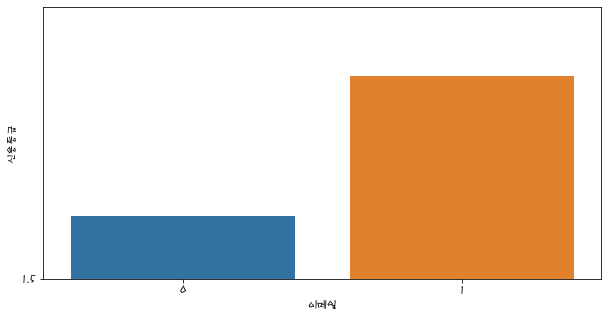

In [97]:
email_df=cardhangul.groupby('이메일')['신용등급'].mean() #이메일 보유 유무
email_df = email_df.reset_index()
email_df
plt.figure(figsize=(10,5)) 
sns.barplot(data=email_df,x='이메일',y='신용등급') 
plt.ylim(1.5,1.57)
plt.yticks(np.arange(1.5,1.57,0.1))
plt.show()

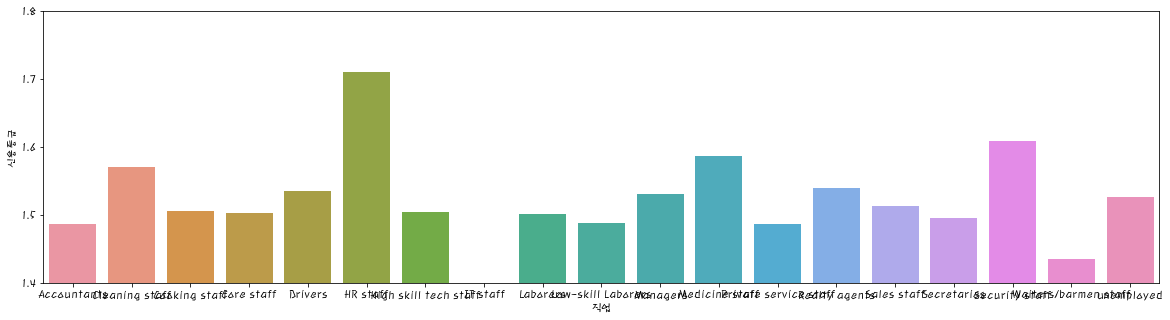

In [99]:
job_df=cardhangul.groupby('직업')['신용등급'].mean() #직업에 따른     <<-- 직업을 보는게 가장좋을듯하다  변동값이 가장큼   
job_df = job_df.reset_index()
job_df
plt.figure(figsize=(20,5)) 
sns.barplot(data=job_df,x='직업',y='신용등급') 
plt.ylim(1.4,1.8)
plt.yticks(np.arange(1.4,1.8,0.1))
plt.show()

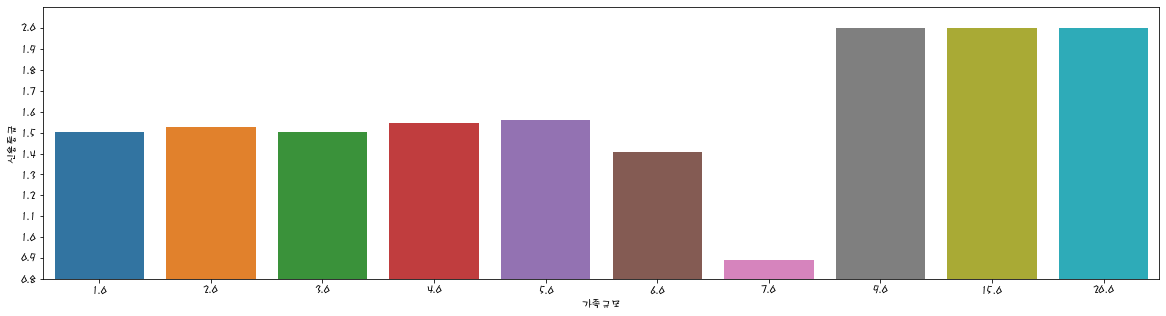

In [100]:
family_df=cardhangul.groupby('가족규모')['신용등급'].mean() #가족규모에 따른 신용등급 
family_df = family_df.reset_index()
family_df
plt.figure(figsize=(20,5)) 
sns.barplot(data=family_df,x='가족규모',y='신용등급') 
plt.ylim(0.8,2.1)
plt.yticks(np.arange(0.8,2.1,0.1))
plt.show()

In [31]:
cardhangul.groupby('카드발급일')['신용등급'].mean() #발급일에 따른 신용등급

카드발급일
-60.0    1.638298
-59.0    1.623967
-58.0    1.602459
-57.0    1.644737
-56.0    1.590551
           ...   
-4.0     1.307002
-3.0     0.839798
-2.0     0.820084
-1.0     0.768675
 0.0     0.640693
Name: 신용등급, Length: 61, dtype: float64